# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this.


# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the github but can be found where the data was taken underneath the data files section.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we will not use to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead has two two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease. Both questions, get at the issue of heart disease.

# Imports and Loading in Data 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow import  keras
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from get_features import *
# import tensorflow_addons as tfa
from keras.metrics import BinaryAccuracy,Precision,Recall,AUC
# from tensorflow_addons.metrics import F1Score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.9.1


In [3]:
print(tf.config.list_physical_devices('GPU'))

[]


In [4]:
heart = pd.read_csv('./Data/heart_df.csv')

In [5]:
heart

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,...,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,...,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,...,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,...,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,...,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,...,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,...,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,...,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,...,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,...,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [6]:
heart.drop(columns = ['education_lvl', 'income_level', 'employment_status', 'rent_own', 'health_care_doctors','no_doc_bc_cost', 'smokeless_tobacco_products', 'high_risk_situations', 'ecigaret', 'state'], inplace = True)

In [7]:
heart.dtypes

general_health            float64
physical_health           float64
mental_health             float64
health_insurance          float64
last_checkup              float64
excercise_30              float64
sleep                     float64
stroke                    float64
asthma                    float64
skin_cancer               float64
other_cancer              float64
copd_type_issue           float64
arthritis_anyform         float64
depressive_disorder       float64
kidney_disease            float64
diabetes                  float64
weight_kg                 float64
height_m                  float64
difficulty_walking        float64
smoke100_lifetime         float64
alcohol_consumption_30    float64
heart_disease             float64
dtype: object

# Train-test-validation split

In [8]:
heart

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,...,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,alcohol_consumption_30,heart_disease
0,2.0,3.0,30.0,2.0,4.0,1.0,5.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,48.0,170.0,2.0,1.0,0.0,0.0
1,3.0,0.0,0.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,...,1.0,1.0,2.0,3.0,NaN,163.0,2.0,NaN,NaN,0.0
2,3.0,0.0,0.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,NaN,173.0,2.0,2.0,0.0,0.0
3,2.0,0.0,0.0,1.0,1.0,1.0,7.0,1.0,2.0,2.0,...,2.0,2.0,2.0,3.0,57.0,168.0,2.0,2.0,0.0,0.0
4,4.0,20.0,30.0,1.0,2.0,1.0,8.0,2.0,1.0,2.0,...,1.0,2.0,2.0,1.0,82.0,175.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,3.0,0.0,0.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,...,2.0,1.0,2.0,3.0,55.0,150.0,2.0,2.0,0.0,0.0
331524,3.0,0.0,0.0,1.0,3.0,2.0,12.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,76.0,152.0,2.0,2.0,0.0,0.0
331525,3.0,0.0,0.0,1.0,2.0,1.0,8.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,72.0,124.0,2.0,2.0,0.0,0.0
331526,3.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,80.0,173.0,2.0,7.0,4.0,0.0


# Preprocessing

In [9]:
train, val, test = np.split(heart.sample(frac=1), [int(0.6*len(heart)), int(0.8*len(heart))])

In [10]:
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

198916 training examples
66306 validation examples
66306 test examples


In [11]:
neg, pos = np.bincount(heart['heart_disease'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 331528
    Positive: 28038 (8.46% of total)



In [12]:
target = heart.pop('heart_disease')

In [13]:
train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,...,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,alcohol_consumption_30,heart_disease
148680,3.0,14.0,0.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,59.0,152.0,2.0,2.0,0.0,0.0
80911,3.0,2.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,84.0,157.0,2.0,2.0,0.0,0.0
179883,3.0,30.0,0.0,1.0,1.0,2.0,5.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,82.0,175.0,1.0,1.0,0.0,0.0
141855,3.0,2.0,5.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,118.0,175.0,2.0,2.0,0.0,0.0
284193,2.0,0.0,1.0,1.0,3.0,2.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,82.0,170.0,2.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206806,3.0,7.0,0.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,...,2.0,2.0,2.0,1.0,109.0,157.0,2.0,2.0,0.0,0.0
54796,2.0,0.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,82.0,173.0,2.0,2.0,30.0,0.0
40810,3.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,...,1.0,2.0,1.0,1.0,102.0,178.0,1.0,1.0,0.0,0.0
265195,3.0,5.0,5.0,1.0,1.0,2.0,8.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,90.0,168.0,1.0,1.0,0.0,0.0


#### Visualization

In [14]:
# Form np arrays of labels and features.
train_labels = np.array(train.pop('heart_disease'))
bool_train_labels = train_labels != 0
val_labels = np.array(val.pop('heart_disease'))
test_labels = np.array(test.pop('heart_disease'))

In [15]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train)

val_features = scaler.transform(val)
test_features = scaler.transform(test)

train_features = np.clip(train, -5, 5)
val_features = np.clip(val, -5, 5)
test_features = np.clip(test, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (198916,)
Validation labels shape: (66306,)
Test labels shape: (66306,)
Training features shape: (198916, 21)
Validation features shape: (66306, 21)
Test features shape: (66306, 21)


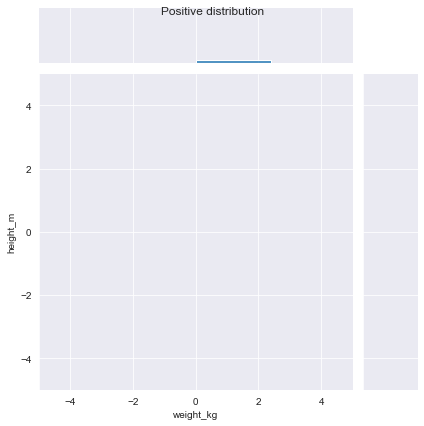

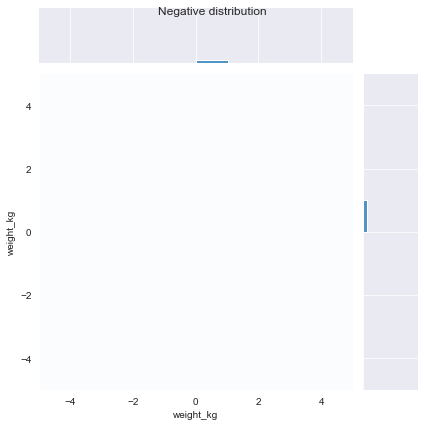

In [16]:
pos_df = pd.DataFrame(train[ bool_train_labels], columns=train.columns)
neg_df = pd.DataFrame(train[~bool_train_labels], columns=train.columns)

sns.jointplot(x=pos_df['weight_kg'], y=pos_df['height_m'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['weight_kg'], y=neg_df['weight_kg'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [17]:
train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,...,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,alcohol_consumption_30
148680,3.0,14.0,0.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,59.0,152.0,2.0,2.0,0.0
80911,3.0,2.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,84.0,157.0,2.0,2.0,0.0
179883,3.0,30.0,0.0,1.0,1.0,2.0,5.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,3.0,82.0,175.0,1.0,1.0,0.0
141855,3.0,2.0,5.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,118.0,175.0,2.0,2.0,0.0
284193,2.0,0.0,1.0,1.0,3.0,2.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,82.0,170.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206806,3.0,7.0,0.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,109.0,157.0,2.0,2.0,0.0
54796,2.0,0.0,1.0,1.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3.0,82.0,173.0,2.0,2.0,30.0
40810,3.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,...,2.0,1.0,2.0,1.0,1.0,102.0,178.0,1.0,1.0,0.0
265195,3.0,5.0,5.0,1.0,1.0,2.0,8.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,1.0,90.0,168.0,1.0,1.0,0.0


#### Imputation

In [18]:
#creating list of columns names that needs to be either scaled or OHE
continous = ['physical_health', 'mental_health', 'last_checkup' , 'excercise_30', 'sleep', 'weight_kg',
             'height_m', 'alcohol_consumption_30']

categorical = list(heart.columns.drop(continous))

In [19]:
# Pipeline for imputation
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(estimator = KNeighborsClassifier(),\
                                                           random_state=42, max_iter = 5))])
scale_pipe = Pipeline(steps=[('scale_impute', IterativeImputer(random_state=42))])

In [20]:
#Creating the column transformer
ct = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
    ('scale', scale_pipe, continous)
]).fit(train)

C:\Users\xiao\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


##### Testing the column transformer

In [21]:
ct_2 = ct.transform(train)

In [22]:
ct_2.shape

(198916, 21)

In [23]:
train_2 = pd.DataFrame(ct_2 , columns=get_feature_names(ct))

C:\Users\xiao\Documents\Flatiron\Heart_Disease\get_features.py:36: UserWarning: Transformer cat_impute (type IterativeImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\xiao\Documents\Flatiron\Heart_Disease\get_features.py:36: UserWarning: Transformer scale_impute (type IterativeImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [24]:
train_2.isna().sum()

cat__general_health              0
cat__health_insurance            0
cat__stroke                      0
cat__asthma                      0
cat__skin_cancer                 0
cat__other_cancer                0
cat__copd_type_issue             0
cat__arthritis_anyform           0
cat__depressive_disorder         0
cat__kidney_disease              0
cat__diabetes                    0
cat__difficulty_walking          0
cat__smoke100_lifetime           0
scale__physical_health           0
scale__mental_health             0
scale__last_checkup              0
scale__excercise_30              0
scale__sleep                     0
scale__weight_kg                 0
scale__height_m                  0
scale__alcohol_consumption_30    0
dtype: int64

In [25]:
train_2.columns = [name.strip().replace("cat__",'').replace("scale__", '') for name in train_2.columns]

In [26]:
train_2.head(1)

,general_health,health_insurance,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,...,difficulty_walking,smoke100_lifetime,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,14.0,0.0,1.0,1.0,7.0,59.0,152.0,0.0


In [27]:
# Transforming all the dataframes
transforming = [train, val , test]

for x in transforming:
    x = ct.transform(x)
    x = pd.DataFrame(x, columns=get_feature_names(ct))
    x.columns = [name.strip().replace("cat__",'').replace("scale__", '') for name in x.columns]

C:\Users\xiao\Documents\Flatiron\Heart_Disease\get_features.py:36: UserWarning: Transformer cat_impute (type IterativeImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\xiao\Documents\Flatiron\Heart_Disease\get_features.py:36: UserWarning: Transformer scale_impute (type IterativeImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\xiao\Documents\Flatiron\Heart_Disease\get_features.py:36: UserWarning: Transformer cat_impute (type IterativeImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\xiao\Documents\Flatiron\Heart_Disease\get_features.py:36: UserWarning: Transformer scale_impute (type IterativeImputer) does not provide get_feature_names. Will return input column names if available
  warning

# Keras Input Pipeline building

In [28]:
# converts df to a dataset
def df_to_dataset(dataframe, shuffle=True, batch_size=200):
    df = heart.copy()
    labels = target
    df = {key: value[:,tf.newaxis] for key, value in heart.items()}
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(heart))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [29]:
batch_size = 20
train_ds = df_to_dataset(train, batch_size=batch_size)

C:\Users\xiao\AppData\Local\Temp/ipykernel_2724/2587102843.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in heart.items()}


In [30]:
#veruufying
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of sleep:', train_features['sleep'])
print('A batch of targets:', label_batch )

Every feature: ['general_health', 'physical_health', 'mental_health', 'health_insurance', 'last_checkup', 'excercise_30', 'sleep', 'stroke', 'asthma', 'skin_cancer', 'other_cancer', 'copd_type_issue', 'arthritis_anyform', 'depressive_disorder', 'kidney_disease', 'diabetes', 'weight_kg', 'height_m', 'difficulty_walking', 'smoke100_lifetime', 'alcohol_consumption_30']
A batch of sleep: tf.Tensor(
[[5.]
 [7.]
 [7.]
 [4.]
 [6.]
 [6.]
 [6.]
 [5.]
 [8.]
 [8.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [7.]
 [7.]
 [8.]
 [7.]
 [8.]], shape=(20, 1), dtype=float64)
A batch of targets: tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(20,), dtype=float64)


### making the scaling layer function

In [31]:
# function that creates the layer for each column for the CONTINUOUS features
def get_normalization_layer(name,dataset):
    '''
    creates a layer for each continous feature as they each need to scaled and be their own layer
    '''
    # Create a Normalization layer for the feature.
    normalizer = layers.Normalization(axis=None)

    # Prepare a Dataset that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

In [32]:
#verifying that it works
testing_standarization = train_features['physical_health']
layer = get_normalization_layer('physical_health', train_ds)
layer(testing_standarization)

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)>

### Making the OHE layer function

In [33]:
#creates the categorical layers for each column
def get_category_encoding_layer(name, dataset,  max_tokens=None):
    index = layers.IntegerLookup(max_tokens=max_tokens)

    # Prepare a `tf.data.Dataset` that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the set of possible values and assign them a fixed integer index.
    index.adapt(feature_ds)

    # Encode the integer indices.
    encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

    # Apply multi-hot encoding to the indices. The lambda function captures the
    # layer, so you can use them, or include them in the Keras Functional model later.
    return lambda feature: encoder(index(feature))

In [34]:
get_normalization_layer('general_health', train_ds)

# Converting our df to tensor layers

In [35]:
all_inputs = []
encoded_features = []

#  Dealing with the continuous numbers
for column_name in continous:
    numeric_col = tf.keras.Input(shape=(1,), name=column_name)
    normalization_layer = get_normalization_layer(column_name, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [36]:
for column_name in categorical:
    categorical_col = tf.keras.Input(shape=(1,), name=column_name)
    encoding_layer = get_category_encoding_layer(column_name,train_ds)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

In [37]:
batch_size = 2000
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

C:\Users\xiao\AppData\Local\Temp/ipykernel_2724/2587102843.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in heart.items()}


# 'Simple' Model 1

In [38]:
all_features

NameError: name 'all_features' is not defined

In [39]:
#uses functional keras API
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(67, activation="relu")(all_features)
x = tf.keras.layers.Dense(67, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation= 'sigmoid')(x)

model = tf.keras.Model(all_inputs, output)

In [40]:
METRICS = [BinaryAccuracy(name='accuracy'),
           Precision(name='precision'),
           Recall(name='recall'),
           AUC(name='auc'),
           AUC(name='prc', curve='PR')] # precision-recall curve
#            F1Score(name= 'f1', num_classes = 2)

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=METRICS)

In [42]:
#weights
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.55
Weight for class 1: 5.91


In [43]:
model.fit(train_ds, epochs=10, validation_data=val_ds, class_weight=class_weight)

Epoch 1/10


C:\Users\xiao\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: Graph execution error:

Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "C:\Users\xiao\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\xiao\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\xiao\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\xiao\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\xiao\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\xiao\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\xiao\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\xiao\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\xiao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\xiao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\xiao\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\xiao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\xiao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\xiao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\xiao\AppData\Local\Temp/ipykernel_2724/1745310715.py", line 1, in <module>
      model.fit(train_ds, epochs=10, validation_data=val_ds, class_weight=class_weight)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\metrics\metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "C:\Users\xiao\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.debugging.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (model/dense_2/Sigmoid:0) = ] [[nan][nan][nan]...] [y (Cast_10/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_769775]

In [ ]:
model.evaluate(test_ds)

In [ ]:
# Model 2

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(53, activation="relu")(all_features)
x = tf.keras.layers.Dense(53, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1, activation= 'sigmoid')(x)

model = tf.keras.Model(all_inputs, output)

# Next Steps

- figuring out a way to incorporate all of the other types of heart conditions that fall under cardiovascular disease. This projects only looks at heart attack and CAD. While the true scale of the disease expands out to high blood pressure, congenitial heart disease etc.

# Documents/ Citations

**Most of the functions here was taken from the folling documents on tensorflow. Adjustments were made to them to fit my data**

[Load a pandas DataFrame](https://www.tensorflow.org/tutorials/load_data/pandas_dataframe)

[Classification on imbalanced data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data)

[Classsify structured data using kera preprocessing layers](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers)

[Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers)

[tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)

[Classify structured data with feature columns](https://www.tensorflow.org/tutorials/structured_data/feature_columns)